In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
df = pd.read_excel('Data Resources/2022_IndePass_V1.xlsx')
df

,DateTime_UTC_7.00,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees
0,2022-01-01 00:00:00,0.0,5.8118,92.5,NaN,0.110000,0.074823,0.105844,-888.890000,NaN,NaN,NaN
1,2022-01-01 01:00:00,0.0,2.0120,91.2,NaN,0.108301,0.074823,0.105844,-888.890000,NaN,NaN,NaN
2,2022-01-01 02:00:00,0.0,1.7096,91.1,NaN,0.107307,0.074823,0.105844,-888.890000,NaN,NaN,NaN
3,2022-01-01 03:00:00,0.0,1.4054,91.4,NaN,0.108301,0.074823,0.105844,-888.890000,NaN,NaN,NaN
4,2022-01-01 04:00:00,0.0,1.8608,91.1,NaN,0.108301,0.074823,0.105844,-888.890000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6456,2022-09-27 06:00:00,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047
6457,2022-09-27 07:00:00,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204
6458,2022-09-27 08:00:00,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898
6459,2022-09-27 09:00:00,0.0,47.1992,41.9,42.7550,0.207641,0.098951,0.129110,49.370079,1.002,2.672,282.188


In [58]:
hx_wx = pd.read_csv('Data Resources/IndependencePass_2016to2021.csv')
hx_wx

,Station_ID,Station_Name,DateTime_UTC-07:00,Rain_in,AirTemp_F,RH_percent,DewPt_F,SoilTemp_F,WaterCont_2in_ m3/m3,WaterCont_8in_ m3/m3,WaterCont_20in_ m3/m3,SnowDepth_In,WindSpeed_ms,WindGust_ms,WindDirection_degrees
0,9,Independence Pass,9/12/16 13:00,0.0,52.641,26.6,NaN,45.715,0.23,0.18,0.14,NaN,NaN,NaN,NaN
1,9,Independence Pass,9/12/16 15:00,0.0,49.958,27.1,NaN,46.706,0.23,0.18,0.13,NaN,NaN,NaN,NaN
2,9,Independence Pass,9/12/16 17:00,0.0,45.850,42.6,NaN,47.781,0.23,0.18,0.13,NaN,NaN,NaN,NaN
3,9,Independence Pass,9/12/16 19:00,0.0,37.846,77.3,NaN,48.494,0.23,0.18,0.13,NaN,NaN,NaN,NaN
4,9,Independence Pass,9/12/16 21:00,0.0,33.977,90.4,NaN,48.761,0.23,0.18,0.13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33838,9,Independence Pass,1/13/22 6:00,0.0,20.900,51.5,NaN,NaN,0.11,0.07,0.10,35.0,NaN,NaN,NaN
33839,9,Independence Pass,1/13/22 7:00,0.0,23.570,59.4,NaN,NaN,0.11,0.07,0.10,36.0,NaN,NaN,NaN
33840,9,Independence Pass,1/13/22 8:00,0.0,27.540,52,NaN,NaN,0.11,0.07,0.10,35.0,NaN,NaN,NaN
33841,9,Independence Pass,1/13/22 9:00,0.0,32.090,40.2,NaN,NaN,0.11,0.07,0.10,37.0,NaN,NaN,NaN


In [59]:
hx_clean= hx_wx.drop(columns=['DewPt_F', 'Station_Name', 'Station_ID', 'WindGust_ms', 'RH_percent'], axis=1)
hx_clean

,DateTime_UTC-07:00,Rain_in,AirTemp_F,SoilTemp_F,WaterCont_2in_ m3/m3,WaterCont_8in_ m3/m3,WaterCont_20in_ m3/m3,SnowDepth_In,WindSpeed_ms,WindDirection_degrees
0,9/12/16 13:00,0.0,52.641,45.715,0.23,0.18,0.14,NaN,NaN,NaN
1,9/12/16 15:00,0.0,49.958,46.706,0.23,0.18,0.13,NaN,NaN,NaN
2,9/12/16 17:00,0.0,45.850,47.781,0.23,0.18,0.13,NaN,NaN,NaN
3,9/12/16 19:00,0.0,37.846,48.494,0.23,0.18,0.13,NaN,NaN,NaN
4,9/12/16 21:00,0.0,33.977,48.761,0.23,0.18,0.13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
33838,1/13/22 6:00,0.0,20.900,NaN,0.11,0.07,0.10,35.0,NaN,NaN
33839,1/13/22 7:00,0.0,23.570,NaN,0.11,0.07,0.10,36.0,NaN,NaN
33840,1/13/22 8:00,0.0,27.540,NaN,0.11,0.07,0.10,35.0,NaN,NaN
33841,1/13/22 9:00,0.0,32.090,NaN,0.11,0.07,0.10,37.0,NaN,NaN


In [60]:
hx_clean['SoilTemp_F'] = pd.to_numeric(hx_clean['SoilTemp_F'], errors='coerce')

In [61]:
cols = hx_clean.select_dtypes(np.number).columns
hx_clean[cols] = hx_clean[cols].clip(lower=0)
hx_clean

,DateTime_UTC-07:00,Rain_in,AirTemp_F,SoilTemp_F,WaterCont_2in_ m3/m3,WaterCont_8in_ m3/m3,WaterCont_20in_ m3/m3,SnowDepth_In,WindSpeed_ms,WindDirection_degrees
0,9/12/16 13:00,0.0,52.641,45.715,0.23,0.18,0.14,NaN,NaN,NaN
1,9/12/16 15:00,0.0,49.958,46.706,0.23,0.18,0.13,NaN,NaN,NaN
2,9/12/16 17:00,0.0,45.850,47.781,0.23,0.18,0.13,NaN,NaN,NaN
3,9/12/16 19:00,0.0,37.846,48.494,0.23,0.18,0.13,NaN,NaN,NaN
4,9/12/16 21:00,0.0,33.977,48.761,0.23,0.18,0.13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
33838,1/13/22 6:00,0.0,20.900,NaN,0.11,0.07,0.10,35.0,NaN,NaN
33839,1/13/22 7:00,0.0,23.570,NaN,0.11,0.07,0.10,36.0,NaN,NaN
33840,1/13/22 8:00,0.0,27.540,NaN,0.11,0.07,0.10,35.0,NaN,NaN
33841,1/13/22 9:00,0.0,32.090,NaN,0.11,0.07,0.10,37.0,NaN,NaN


In [62]:
hx_clean.dtypes

DateTime_UTC-07:00        object
Rain_in                  float64
AirTemp_F                float64
SoilTemp_F               float64
WaterCont_2in_ m3/m3     float64
WaterCont_8in_ m3/m3     float64
WaterCont_20in_ m3/m3    float64
SnowDepth_In             float64
WindSpeed_ms             float64
WindDirection_degrees    float64
dtype: object

In [63]:
hx_clean['Date'] = pd.to_datetime(hx_clean['DateTime_UTC-07:00'])
hx_clean

,DateTime_UTC-07:00,Rain_in,AirTemp_F,SoilTemp_F,WaterCont_2in_ m3/m3,WaterCont_8in_ m3/m3,WaterCont_20in_ m3/m3,SnowDepth_In,WindSpeed_ms,WindDirection_degrees,Date
0,9/12/16 13:00,0.0,52.641,45.715,0.23,0.18,0.14,NaN,NaN,NaN,2016-09-12 13:00:00
1,9/12/16 15:00,0.0,49.958,46.706,0.23,0.18,0.13,NaN,NaN,NaN,2016-09-12 15:00:00
2,9/12/16 17:00,0.0,45.850,47.781,0.23,0.18,0.13,NaN,NaN,NaN,2016-09-12 17:00:00
3,9/12/16 19:00,0.0,37.846,48.494,0.23,0.18,0.13,NaN,NaN,NaN,2016-09-12 19:00:00
4,9/12/16 21:00,0.0,33.977,48.761,0.23,0.18,0.13,NaN,NaN,NaN,2016-09-12 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...
33838,1/13/22 6:00,0.0,20.900,NaN,0.11,0.07,0.10,35.0,NaN,NaN,2022-01-13 06:00:00
33839,1/13/22 7:00,0.0,23.570,NaN,0.11,0.07,0.10,36.0,NaN,NaN,2022-01-13 07:00:00
33840,1/13/22 8:00,0.0,27.540,NaN,0.11,0.07,0.10,35.0,NaN,NaN,2022-01-13 08:00:00
33841,1/13/22 9:00,0.0,32.090,NaN,0.11,0.07,0.10,37.0,NaN,NaN,2022-01-13 09:00:00


In [64]:
hxwx= hx_clean.drop(columns=['DateTime_UTC-07:00'])
hxwx_cleaned = hxwx.fillna(0)
hxwx_cleaned

,Rain_in,AirTemp_F,SoilTemp_F,WaterCont_2in_ m3/m3,WaterCont_8in_ m3/m3,WaterCont_20in_ m3/m3,SnowDepth_In,WindSpeed_ms,WindDirection_degrees,Date
0,0.0,52.641,45.715,0.23,0.18,0.14,0.0,0.0,0.0,2016-09-12 13:00:00
1,0.0,49.958,46.706,0.23,0.18,0.13,0.0,0.0,0.0,2016-09-12 15:00:00
2,0.0,45.850,47.781,0.23,0.18,0.13,0.0,0.0,0.0,2016-09-12 17:00:00
3,0.0,37.846,48.494,0.23,0.18,0.13,0.0,0.0,0.0,2016-09-12 19:00:00
4,0.0,33.977,48.761,0.23,0.18,0.13,0.0,0.0,0.0,2016-09-12 21:00:00
...,...,...,...,...,...,...,...,...,...,...
33838,0.0,20.900,0.000,0.11,0.07,0.10,35.0,0.0,0.0,2022-01-13 06:00:00
33839,0.0,23.570,0.000,0.11,0.07,0.10,36.0,0.0,0.0,2022-01-13 07:00:00
33840,0.0,27.540,0.000,0.11,0.07,0.10,35.0,0.0,0.0,2022-01-13 08:00:00
33841,0.0,32.090,0.000,0.11,0.07,0.10,37.0,0.0,0.0,2022-01-13 09:00:00


In [48]:
clean_df = df.fillna(0)
clean_df

,DateTime_UTC_7.00,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees
0,2022-01-01 00:00:00,0.0,5.8118,92.5,0.0000,0.110000,0.074823,0.105844,-888.890000,0.000,0.000,0.000
1,2022-01-01 01:00:00,0.0,2.0120,91.2,0.0000,0.108301,0.074823,0.105844,-888.890000,0.000,0.000,0.000
2,2022-01-01 02:00:00,0.0,1.7096,91.1,0.0000,0.107307,0.074823,0.105844,-888.890000,0.000,0.000,0.000
3,2022-01-01 03:00:00,0.0,1.4054,91.4,0.0000,0.108301,0.074823,0.105844,-888.890000,0.000,0.000,0.000
4,2022-01-01 04:00:00,0.0,1.8608,91.1,0.0000,0.108301,0.074823,0.105844,-888.890000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
6456,2022-09-27 06:00:00,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047
6457,2022-09-27 07:00:00,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204
6458,2022-09-27 08:00:00,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898
6459,2022-09-27 09:00:00,0.0,47.1992,41.9,42.7550,0.207641,0.098951,0.129110,49.370079,1.002,2.672,282.188


In [11]:
clean_df.dtypes

DateTime_UTC_7.00       object
Rain_in                float64
AirTemp_F              float64
RH_percent             float64
SoilTemp_F             float64
WaterCont_2in_m3m3     float64
WaterCont_8in_m3m3     float64
WaterCont_20in_m3m3    float64
SnowDepth_in           float64
WindSpeed_ms           float64
WindGust_ms            float64
WindDir_Degrees        float64
dtype: object

In [12]:
clean_df = clean_df.drop(labels=6460, axis=0)

In [13]:
clean_df['Date'] = pd.to_datetime(clean_df['DateTime_UTC_7.00'])
clean_df

,DateTime_UTC_7.00,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees,Date
0,2022-01-01 00:00:00,0.0,5.8118,92.5,0.0000,0.110000,0.074823,0.105844,-888.890000,0.000,0.000,0.000,2022-01-01 00:00:00
1,2022-01-01 01:00:00,0.0,2.0120,91.2,0.0000,0.108301,0.074823,0.105844,-888.890000,0.000,0.000,0.000,2022-01-01 01:00:00
2,2022-01-01 02:00:00,0.0,1.7096,91.1,0.0000,0.107307,0.074823,0.105844,-888.890000,0.000,0.000,0.000,2022-01-01 02:00:00
3,2022-01-01 03:00:00,0.0,1.4054,91.4,0.0000,0.108301,0.074823,0.105844,-888.890000,0.000,0.000,0.000,2022-01-01 03:00:00
4,2022-01-01 04:00:00,0.0,1.8608,91.1,0.0000,0.108301,0.074823,0.105844,-888.890000,0.000,0.000,0.000,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,2022-09-27 05:00:00,0.0,40.5320,55.6,44.1266,0.205654,0.098089,0.129110,49.031890,0.668,1.336,150.220,2022-09-27 05:00:00
6456,2022-09-27 06:00:00,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047,2022-09-27 06:00:00
6457,2022-09-27 07:00:00,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204,2022-09-27 07:00:00
6458,2022-09-27 08:00:00,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898,2022-09-27 08:00:00


In [14]:
clean_df['SnowDepth_in'] = clean_df['SnowDepth_in'].clip(lower=0)
clean_df

,DateTime_UTC_7.00,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees,Date
0,2022-01-01 00:00:00,0.0,5.8118,92.5,0.0000,0.110000,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 00:00:00
1,2022-01-01 01:00:00,0.0,2.0120,91.2,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 01:00:00
2,2022-01-01 02:00:00,0.0,1.7096,91.1,0.0000,0.107307,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 02:00:00
3,2022-01-01 03:00:00,0.0,1.4054,91.4,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 03:00:00
4,2022-01-01 04:00:00,0.0,1.8608,91.1,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,2022-09-27 05:00:00,0.0,40.5320,55.6,44.1266,0.205654,0.098089,0.129110,49.031890,0.668,1.336,150.220,2022-09-27 05:00:00
6456,2022-09-27 06:00:00,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047,2022-09-27 06:00:00
6457,2022-09-27 07:00:00,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204,2022-09-27 07:00:00
6458,2022-09-27 08:00:00,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898,2022-09-27 08:00:00


In [15]:
clean_df.drop_duplicates()

,DateTime_UTC_7.00,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees,Date
0,2022-01-01 00:00:00,0.0,5.8118,92.5,0.0000,0.110000,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 00:00:00
1,2022-01-01 01:00:00,0.0,2.0120,91.2,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 01:00:00
2,2022-01-01 02:00:00,0.0,1.7096,91.1,0.0000,0.107307,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 02:00:00
3,2022-01-01 03:00:00,0.0,1.4054,91.4,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 03:00:00
4,2022-01-01 04:00:00,0.0,1.8608,91.1,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6455,2022-09-27 05:00:00,0.0,40.5320,55.6,44.1266,0.205654,0.098089,0.129110,49.031890,0.668,1.336,150.220,2022-09-27 05:00:00
6456,2022-09-27 06:00:00,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047,2022-09-27 06:00:00
6457,2022-09-27 07:00:00,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204,2022-09-27 07:00:00
6458,2022-09-27 08:00:00,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898,2022-09-27 08:00:00


In [16]:
clean_df.dtypes

DateTime_UTC_7.00              object
Rain_in                       float64
AirTemp_F                     float64
RH_percent                    float64
SoilTemp_F                    float64
WaterCont_2in_m3m3            float64
WaterCont_8in_m3m3            float64
WaterCont_20in_m3m3           float64
SnowDepth_in                  float64
WindSpeed_ms                  float64
WindGust_ms                   float64
WindDir_Degrees               float64
Date                   datetime64[ns]
dtype: object

In [17]:
wx_df = clean_df.drop(columns=['DateTime_UTC_7.00'])
wx_df

,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees,Date
0,0.0,5.8118,92.5,0.0000,0.110000,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 00:00:00
1,0.0,2.0120,91.2,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 01:00:00
2,0.0,1.7096,91.1,0.0000,0.107307,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 02:00:00
3,0.0,1.4054,91.4,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 03:00:00
4,0.0,1.8608,91.1,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
6455,0.0,40.5320,55.6,44.1266,0.205654,0.098089,0.129110,49.031890,0.668,1.336,150.220,2022-09-27 05:00:00
6456,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047,2022-09-27 06:00:00
6457,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204,2022-09-27 07:00:00
6458,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898,2022-09-27 08:00:00


In [18]:
wx_df['Rain_in'] = wx_df['Rain_in'].clip(lower=0)
wx_df

,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees,Date
0,0.0,5.8118,92.5,0.0000,0.110000,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 00:00:00
1,0.0,2.0120,91.2,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 01:00:00
2,0.0,1.7096,91.1,0.0000,0.107307,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 02:00:00
3,0.0,1.4054,91.4,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 03:00:00
4,0.0,1.8608,91.1,0.0000,0.108301,0.074823,0.105844,0.000000,0.000,0.000,0.000,2022-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
6455,0.0,40.5320,55.6,44.1266,0.205654,0.098089,0.129110,49.031890,0.668,1.336,150.220,2022-09-27 05:00:00
6456,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047,2022-09-27 06:00:00
6457,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204,2022-09-27 07:00:00
6458,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898,2022-09-27 08:00:00


In [72]:
dates = wx_df[wx_df['Date'] >= '2022-06']
dates

,Rain_in,AirTemp_F,RH_percent,SoilTemp_F,WaterCont_2in_m3m3,WaterCont_8in_m3m3,WaterCont_20in_m3m3,SnowDepth_in,WindSpeed_ms,WindGust_ms,WindDir_Degrees,Date
3624,0.0,27.5900,97.6,0.0000,0.405327,0.298865,0.268706,0.236614,0.000,0.000,0.000,2022-06-01 00:00:00
3625,0.0,27.2750,98.2,0.0000,0.404334,0.296280,0.268706,0.439370,0.000,0.000,0.000,2022-06-01 01:00:00
3626,0.0,26.6432,98.2,0.0000,0.403340,0.294557,0.268706,0.447244,0.000,0.000,0.000,2022-06-01 02:00:00
3627,0.0,26.4830,98.4,0.0000,0.400360,0.292833,0.268706,0.447244,0.000,0.000,0.000,2022-06-01 03:00:00
3628,0.0,26.5370,98.5,0.0000,0.398373,0.291972,0.270429,0.161417,0.000,0.000,0.000,2022-06-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
6455,0.0,40.5320,55.6,44.1266,0.205654,0.098089,0.129110,49.031890,0.668,1.336,150.220,2022-09-27 05:00:00
6456,0.0,39.6896,52.4,43.7630,0.205654,0.098951,0.129110,49.648425,0.334,1.336,160.047,2022-09-27 06:00:00
6457,0.0,40.3448,50.2,43.3508,0.205654,0.098951,0.129110,49.340157,0.334,1.336,216.204,2022-09-27 07:00:00
6458,0.0,44.3102,47.5,43.0304,0.205654,0.098951,0.129110,48.971654,0.668,2.004,249.898,2022-09-27 08:00:00


<AxesSubplot:xlabel='Date'>

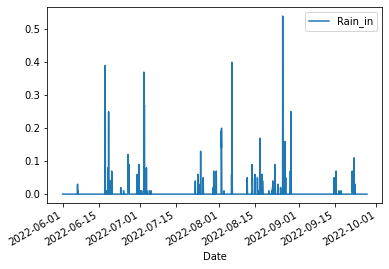

In [20]:
dates.plot.line(x='Date', y='Rain_in')

<AxesSubplot:xlabel='Date'>

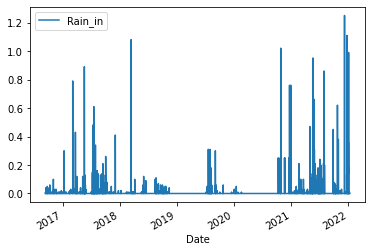

In [65]:
hxwx.plot(x='Date', y='Rain_in')

<AxesSubplot:xlabel='Date', ylabel='Rain_in'>

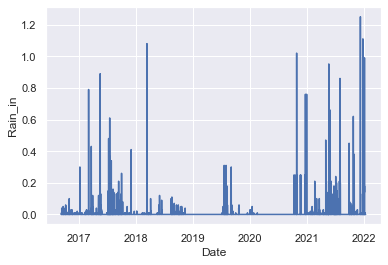

In [83]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="Date", y="Rain_in",
             data=hxwx)